In [1]:
import os
import re

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
MAIN_DIR = os.path.relpath(os.path.dirname(os.path.abspath('__file__'))) # relative path of the main directory
data_dir = DEFAULT_DATA_DIR = os.path.join(MAIN_DIR, "data") # relative path of data dir

train_context_path = os.path.join(data_dir, "train.context")
train_qn_path = os.path.join(data_dir, "train.question")
train_ans_path = os.path.join(data_dir, "train.span")
dev_context_path = os.path.join(data_dir, "dev.context")
dev_qn_path = os.path.join(data_dir, "dev.question")
dev_ans_path = os.path.join(data_dir, "dev.span")

def split_by_whitespace(sentence):
    words = []
    for space_separated_fragment in sentence.strip().split():
        words.extend(re.split(" ", space_separated_fragment))
    return [w for w in words if w]

In [3]:
train_context = list(open(train_context_path))
train_qn = list(open(train_qn_path))
train_ans = list(open(train_ans_path))
train_ans_span = list(map(lambda x:[int(x[0]), int(x[1])], map(split_by_whitespace, train_ans)))

dev_context = list(open(dev_context_path))
dev_qn = list(open(dev_qn_path))
dev_ans = list(open(dev_ans_path))
dev_ans_span = list(map(lambda x:[int(x[0]), int(x[1])], map(split_by_whitespace, dev_ans)))

train_context_len = list(map(len, map(split_by_whitespace, train_context)))
train_qn_len = list(map(len, map(split_by_whitespace, train_qn)))
train_ans_len = list(map(lambda x: int(x[1]) - int(x[0]) + 1, map(split_by_whitespace, train_ans)))

dev_context_len = list(map(len, map(split_by_whitespace, dev_context)))
dev_qn_len = list(map(len, map(split_by_whitespace, dev_qn)))
dev_ans_len = list(map(lambda x: int(x[1]) - int(x[0]) + 1, map(split_by_whitespace, dev_ans)))

In [4]:
print('Size of training set: {}'.format(len(train_context)))
print('Size of dev set: {}'.format(len(dev_context)))

Size of training set: 86303
Size of dev set: 10391


Size of training set: 86303
Train context: min len 22; max len 766; >600: 19
Train question: min len 1; max len 60; >30: 86
Train answer: min len 1; max len 46; >30: 57


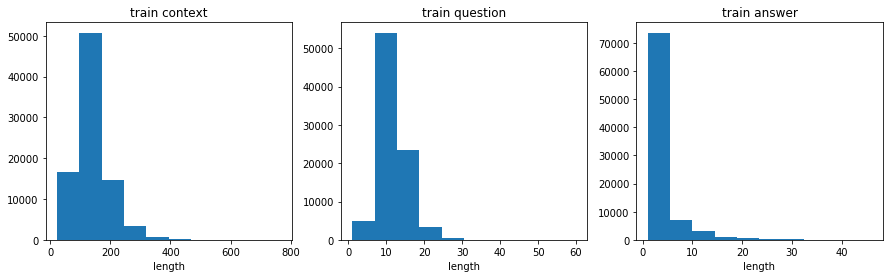

In [5]:
print('Size of training set: {}'.format(len(train_context)))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(train_context_len);
plt.title('train context');
plt.xlabel('length');
thres = 600
print('Train context: min len {}; max len {}; >{}: {}'.\
      format(min(train_context_len), max(train_context_len), \
             thres, sum(map(lambda x: x >= thres, train_context_len))))

plt.subplot(1, 3, 2)
plt.hist(train_qn_len);
plt.title('train question');
plt.xlabel('length');
thres = 30
print('Train question: min len {}; max len {}; >{}: {}'.\
      format(min(train_qn_len), max(train_qn_len), \
             thres, sum(map(lambda x: x >= thres, train_qn_len))))


plt.subplot(1, 3, 3)
plt.hist(train_ans_len);
plt.title('train answer');
plt.xlabel('length');
thres = 30
print('Train answer: min len {}; max len {}; >{}: {}'.\
      format(min(train_ans_len), max(train_ans_len), \
             thres, sum(map(lambda x: x >= thres, train_ans_len))))

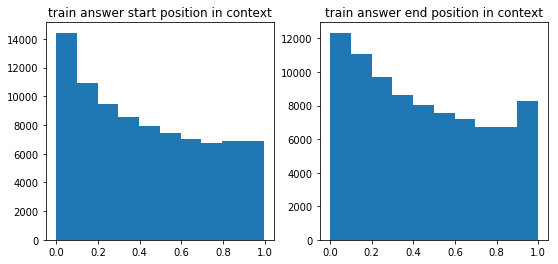

In [6]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.hist([x[0] / train_context_len[i] for i, x in enumerate(train_ans_span)]);
plt.title('train answer start position in context');

plt.subplot(1, 2, 2)
plt.hist([x[1] / train_context_len[i] for i, x in enumerate(train_ans_span)]);
plt.title('train answer end position in context');

The answer is more likely to appear at the beginning of the context.

Size of dev set: 10391
Dev context: min len 24; max len 700; >600: 9
Dev question: min len 3; max len 34; >30: 9
Dev answer: min len 1; max len 37; >30: 1


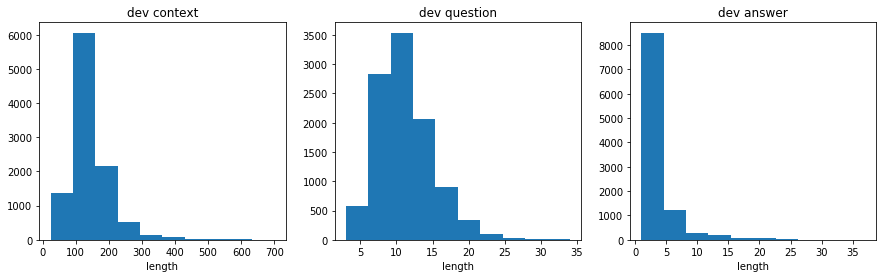

In [7]:
print('Size of dev set: {}'.format(len(dev_context)))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(dev_context_len);
plt.title('dev context');
plt.xlabel('length');
thres = 600
print('Dev context: min len {}; max len {}; >{}: {}'.\
      format(min(dev_context_len), max(dev_context_len), \
             thres, sum(map(lambda x: x >= thres, dev_context_len))))

plt.subplot(1, 3, 2)
plt.hist(dev_qn_len);
plt.title('dev question');
plt.xlabel('length');
thres = 30
print('Dev question: min len {}; max len {}; >{}: {}'.\
      format(min(dev_qn_len), max(dev_qn_len), \
             thres, sum(map(lambda x: x >= thres, dev_qn_len))))


plt.subplot(1, 3, 3)
plt.hist(dev_ans_len);
plt.title('dev answer');
plt.xlabel('length');
thres = 30
print('Dev answer: min len {}; max len {}; >{}: {}'.\
      format(min(dev_ans_len), max(dev_ans_len), \
             thres, sum(map(lambda x: x >= thres, dev_ans_len))))

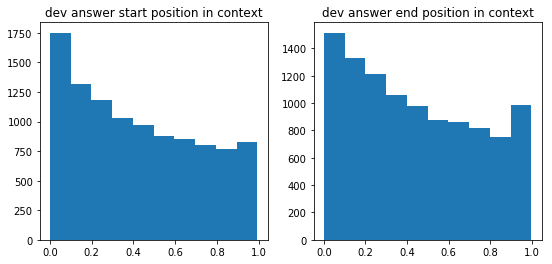

In [8]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.hist([x[0] / dev_context_len[i] for i, x in enumerate(dev_ans_span)]);
plt.title('dev answer start position in context');

plt.subplot(1, 2, 2)
plt.hist([x[1] / dev_context_len[i] for i, x in enumerate(dev_ans_span)]);
plt.title('dev answer end position in context');

The statistics of dev set are similar to those of training set.